# Quoted

In [1]:
import pandas as pd
import numpy as np
import pickle 

### Read Pickles

In [2]:
df_2010 = pd.read_pickle('df_2010P.pkl')
print("finished reading year 2010")

df_2011 = pd.read_pickle('df_2011P.pkl')
print("finished reading year 2011")

df_2012 = pd.read_pickle('df_2012P.pkl')
print("finished reading year 2012")

df_2013 = pd.read_pickle('df_2013P.pkl')
print("finished reading year 2013")

df_2014 = pd.read_pickle('df_2014P.pkl')
print("finished reading year 2014")

df_2015 = pd.read_pickle('df_2015P.pkl')
print("finished reading year 2015")

df_2016 = pd.read_pickle('df_2016P.pkl')
print("finished reading year 2016")

df_2017 = pd.read_pickle('df_2017P.pkl')
print("finished reading year 2017")

df_2018 = pd.read_pickle('df_2018P.pkl')
print("finished reading year 2018")

df_2019 = pd.read_pickle('df_2019P.pkl')
print("finished reading year 2019")

df_2020 = pd.read_pickle('df_2020P.pkl')
print("finished reading year 2020")

# display(df_2020)

finished reading year 2010
finished reading year 2011
finished reading year 2012
finished reading year 2013
finished reading year 2014
finished reading year 2015
finished reading year 2016
finished reading year 2017
finished reading year 2018
finished reading year 2019
finished reading year 2020


In [3]:
### update columns name for 11 years, so each dataframe has the same name of columns
### the purpose of doing this is to prepare for concatenation in next step

countries = ['txtfiles_au','txtfiles_bd','txtfiles_ca','txtfiles_gb','txtfiles_gh','txtfiles_hk','txtfiles_ie',
             'txtfiles_in','txtfiles_jm','txtfiles_ke','txtfiles_lk','txtfiles_my','txtfiles_ng','txtfiles_nz',
             'txtfiles_ph','txtfiles_pk','txtfiles_sg','txtfiles_tz','txtfiles_us','txtfiles_za']

df_2010.columns = countries
df_2011.columns = countries
df_2012.columns = countries
df_2013.columns = countries
df_2014.columns = countries
df_2015.columns = countries
df_2016.columns = countries
df_2017.columns = countries
df_2018.columns = countries
df_2019.columns = countries
df_2020.columns = countries

In [4]:
### use pd.concat method to concate 11 years dataframe to make a bigger dateframe that consists of all articles

### ignore_index=Ture: do not use the index values on the concatenation axis. 
### The resulting axis will be labeled 0, …, n - 1.
frames = [df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020]
df_2010to2020 = pd.concat(frames, ignore_index=True)

### 122 rows = 12 (2010) + 11 (2011) + 9 (2012) + 12 (2013) + 12 (2014) + 10 (2015) 
###            + 11 (2016) + 12 (2017) + 12 (2018) + 12 (2019) + 9 (2020)
# display(df_2010to2020)

### Removing Named Entities

In [5]:
# ### Use Terminal or Command prompt and type in the following command after installing spacy:
# ### python -m spacy download en_core_web_sm

# import spacy

# ### load spacy model
# nlp = spacy.load('en_core_web_sm')

In [6]:
# ### Method 1 Named Entity Recognition (NER) on original articles using Spacy
# ### Taking too long... 0.5h for 59 articles => 1h for 1 country => total about 20h

# keys_to_remove = []
# count = 0
# for article in df_2010to2020.txtfiles_au.dropna():
#     count += 1
#     print(count)
#     for quotes in article:
#         doc = nlp(quotes)
#         for ent in doc.ents:
#             keys_to_remove.append(ent.text)
# print(keys_to_remove)

# ### Error: [E088] Text of length 1103363 exceeds maximum of 1000000. 
# ### The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. 
# ### This means long texts may cause memory allocation errors. 
# ### If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. 
# ### The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [7]:
### Method 2 Named Entity Recognition (NER) on (word, count) tuple using Spacy
### reference: https://www.geeksforgeeks.org/text-preprocessing-in-python-set-1/
### reference: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [8]:
### Remove numbers

import re
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

In [9]:
### Remove punctuation

import string
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [10]:
### Stopwords recognition

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\LIN
[nltk_data]     SHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
### Countries recognition
### https://pytutorial.com/python-extract-country-from-text

countries = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']
map_countries = (map(lambda x: x.lower(), countries))
countries = list(map_countries)
print(countries)

['afghanistan', 'aland islands', 'albania', 'algeria', 'american samoa', 'andorra', 'angola', 'anguilla', 'antarctica', 'antigua and barbuda', 'argentina', 'armenia', 'aruba', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bermuda', 'bhutan', 'bolivia, plurinational state of', 'bonaire, sint eustatius and saba', 'bosnia and herzegovina', 'botswana', 'bouvet island', 'brazil', 'british indian ocean territory', 'brunei darussalam', 'bulgaria', 'burkina faso', 'burundi', 'cambodia', 'cameroon', 'canada', 'cape verde', 'cayman islands', 'central african republic', 'chad', 'chile', 'china', 'christmas island', 'cocos (keeling) islands', 'colombia', 'comoros', 'congo', 'congo, the democratic republic of the', 'cook islands', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'curaçao', 'cyprus', 'czech republic', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'equatori

In [12]:
### Manually recognize other named entities
### https://pytutorial.com/python-extract-country-from-text

othr_manu = ['abuja', 'africa', 'african', 'ahmed', 'al', 'arican', 'asia', 'auckland', 'australian', 'australians', 'bangabandhu', 'bangla', 'bangladeshi', 'bbc', 'british', 'buhari', 'ca', 'canadian', 'canadians', 'cant', 'chinese', 'chittagong', 'cork', 'dhaka', 'didnt', 'dont', 'dublin', 'dunedin', 'eu', 'europe', 'european', 'galway', 'ghanaian', 'ghanaians', 'hasina', 'hes', 'hossain', 'hong', 'im', 'imran', 'indian', 'iran', 'irish', 'islam', 'ive', 'john', 'jonathan', 'karachi', 'kashmir', 'kenyan', 'kenyans', 'kenyatta', 'khan', 'kong', 'lagos', 'lee', 'london', 'maori', 'melbourne', 'michael', 'mombasa', 'mr', 'nairobi', 'nawaz', 'nigerian', 'nigerians', 'nsw', 'nt', 'nz', 'one', 'ontario', 'otago', 'ottawa', 'pakistani', 'pakistans', 'punjab', 'rahman', 'raila', 'rohingya', 'ruto', 'said', 'say', 'scotland', 'scottish', 'sindh', 'singaporeans', 'sydney', 'tanzania', 'tanzanian', 'tanzanians', 'theyre', 'three', 'toronto', 'trump', 'two', 'uhuru', 'uk', 'upazila', 'vancouver', 'wellington', 'zanzibar', 'zealand', 'zealanders']
map_othr_manu = (map(lambda x: x.lower(), othr_manu))
othr_manu = list(map_othr_manu)
print(othr_manu)

['abuja', 'africa', 'african', 'ahmed', 'al', 'arican', 'asia', 'auckland', 'australian', 'australians', 'bangabandhu', 'bangla', 'bangladeshi', 'bbc', 'british', 'buhari', 'ca', 'canadian', 'canadians', 'cant', 'chinese', 'chittagong', 'cork', 'dhaka', 'didnt', 'dont', 'dublin', 'dunedin', 'eu', 'europe', 'european', 'galway', 'ghanaian', 'ghanaians', 'hasina', 'hes', 'hossain', 'hong', 'im', 'imran', 'indian', 'iran', 'irish', 'islam', 'ive', 'john', 'jonathan', 'karachi', 'kashmir', 'kenyan', 'kenyans', 'kenyatta', 'khan', 'kong', 'lagos', 'lee', 'london', 'maori', 'melbourne', 'michael', 'mombasa', 'mr', 'nairobi', 'nawaz', 'nigerian', 'nigerians', 'nsw', 'nt', 'nz', 'one', 'ontario', 'otago', 'ottawa', 'pakistani', 'pakistans', 'punjab', 'rahman', 'raila', 'rohingya', 'ruto', 'said', 'say', 'scotland', 'scottish', 'sindh', 'singaporeans', 'sydney', 'tanzania', 'tanzanian', 'tanzanians', 'theyre', 'three', 'toronto', 'trump', 'two', 'uhuru', 'uk', 'upazila', 'vancouver', 'wellingto

### Counting Top 300 Words

In [13]:
### input: dataframe serie
### output: a dictionary in which key is the word, value is the count        

def count_words(country_serie):

    # create a dictionary. If key doesn't exist, set its value to be 0, otherwise its value + 1
    counts = {}
    for article in country_serie:
        for quotes in article:
            quotes = remove_numbers(quotes)
            quotes = remove_punctuation(quotes)
            words = quotes.lower().split()
            for word in words:
                if word not in stop_words:
                    if word not in countries:
                        if word not in othr_manu:
                            counts[word] = counts.get(word, 0) + 1
            
    return counts

In [14]:
### input: a dictionary of words and counts, top_value
### output: a list of tuple (word, count) for top_value most

def rank_tuples(counts,top_value):
    
    # use tuple to exchange key and value
    lst = list()
    for key, val in counts.items():
        newtup = (val, key)
        lst.append(newtup)

    # sort by value in pair and get the most 300
    # sortedLst contains tuples (val, key)
    sortedLst = sorted(lst, reverse=True)[:top_value]
    
    # exchange key and value back
    resLst = list()
    for val, key in sortedLst:
        newtup = (key, val)
        resLst.append(newtup)
        
    return resLst

In [15]:
# ### input: a dataframe serie
# ### output: name_entity appeared in top500 

# def ner500(country_serie):
#     words_country_2010to2020 = ''
#     top500_country_2010to2020 = rank_tuples(count_words(country_serie),500)
#     for key, val in top500_country_2010to2020:
#         words_country_2010to2020 += (key + ' ')
        
#     # load data
#     doc = nlp(words_country_2010to2020)
 
#     # print entities
#     name_entity = []
#     for ent in doc.ents:
#         name_entity.append(ent.text)
        
#     return name_entity

In [16]:
def most300(country_serie):
    counts = count_words(country_serie)
    count_country_2010to2020 = rank_tuples(counts,300)
    return count_country_2010to2020

In [17]:
# ### input: country_serie (for example: df_2010to2020.txtfiles_au.dropna()).
# ### if not dropna(), error
# ### output: a list that consists of the most frequent 300 pairs (key: word + value: occurance times) for 2010to2020

# def most300(country_serie):
#     counts = count_words(country_serie)
    
#     # pop all pairs in which keys are not words
#     keys_to_remove = ner500(country_serie)
    
#     for key in keys_to_remove:
#         counts.pop(key, None)
    
#     count_country_2010to2020 = rank_tuples(counts,300)
#     return count_country_2010to2020

In [18]:
### calculate the most frequent 300 words for each country 2010to2020

count_au_2010to2020 = most300(df_2010to2020.txtfiles_au)
print('finished counting au')
count_bd_2010to2020 = most300(df_2010to2020.txtfiles_bd)
print('finished counting bd')
count_ca_2010to2020 = most300(df_2010to2020.txtfiles_ca)
print('finished counting ca')
count_gb_2010to2020 = most300(df_2010to2020.txtfiles_gb)
print('finished counting gb')
count_gh_2010to2020 = most300(df_2010to2020.txtfiles_gh)
print('finished counting gh')
count_hk_2010to2020 = most300(df_2010to2020.txtfiles_hk)
print('finished counting hk')
count_ie_2010to2020 = most300(df_2010to2020.txtfiles_ie)
print('finished counting ie')
count_in_2010to2020 = most300(df_2010to2020.txtfiles_in)
print('finished counting in')
count_jm_2010to2020 = most300(df_2010to2020.txtfiles_jm)
print('finished counting jm')
count_ke_2010to2020 = most300(df_2010to2020.txtfiles_ke)
print('finished counting ke')
count_lk_2010to2020 = most300(df_2010to2020.txtfiles_lk)
print('finished counting lk')
count_my_2010to2020 = most300(df_2010to2020.txtfiles_my)
print('finished counting my')
count_ng_2010to2020 = most300(df_2010to2020.txtfiles_ng)
print('finished counting ng')
count_nz_2010to2020 = most300(df_2010to2020.txtfiles_nz)
print('finished counting nz')
count_ph_2010to2020 = most300(df_2010to2020.txtfiles_ph)
print('finished counting ph')
count_pk_2010to2020 = most300(df_2010to2020.txtfiles_pk)
print('finished counting pk')
count_sg_2010to2020 = most300(df_2010to2020.txtfiles_sg)
print('finished counting sg')
count_tz_2010to2020 = most300(df_2010to2020.txtfiles_tz)
print('finished counting tz')
count_us_2010to2020 = most300(df_2010to2020.txtfiles_us)
print('finished counting us')
count_za_2010to2020 = most300(df_2010to2020.txtfiles_za)
print('finished counting za')

finished counting au
finished counting bd
finished counting ca
finished counting gb
finished counting gh
finished counting hk
finished counting ie
finished counting in
finished counting jm
finished counting ke
finished counting lk
finished counting my
finished counting ng
finished counting nz
finished counting ph
finished counting pk
finished counting sg
finished counting tz
finished counting us
finished counting za


In [19]:
with open('quoted_count_au.pkl', 'wb') as f:
    pickle.dump(count_au_2010to2020, f)
    
with open('quoted_count_bd.pkl', 'wb') as f:
    pickle.dump(count_bd_2010to2020, f)
    
with open('quoted_count_ca.pkl', 'wb') as f:
    pickle.dump(count_ca_2010to2020, f)
    
with open('quoted_count_gb.pkl', 'wb') as f:
    pickle.dump(count_gb_2010to2020, f)
    
with open('quoted_count_gh.pkl', 'wb') as f:
    pickle.dump(count_gh_2010to2020, f)
    
with open('quoted_count_hk.pkl', 'wb') as f:
    pickle.dump(count_hk_2010to2020, f)
    
with open('quoted_count_ie.pkl', 'wb') as f:
    pickle.dump(count_ie_2010to2020, f)
    
with open('quoted_count_in.pkl', 'wb') as f:
    pickle.dump(count_in_2010to2020, f)
    
with open('quoted_count_jm.pkl', 'wb') as f:
    pickle.dump(count_jm_2010to2020, f)
    
with open('quoted_count_ke.pkl', 'wb') as f:
    pickle.dump(count_ke_2010to2020, f)
    
with open('quoted_count_lk.pkl', 'wb') as f:
    pickle.dump(count_lk_2010to2020, f)
    
with open('quoted_count_my.pkl', 'wb') as f:
    pickle.dump(count_my_2010to2020, f)
    
with open('quoted_count_ng.pkl', 'wb') as f:
    pickle.dump(count_ng_2010to2020, f)
    
with open('quoted_count_nz.pkl', 'wb') as f:
    pickle.dump(count_nz_2010to2020, f)
    
with open('quoted_count_ph.pkl', 'wb') as f:
    pickle.dump(count_ph_2010to2020, f)
    
with open('quoted_count_pk.pkl', 'wb') as f:
    pickle.dump(count_pk_2010to2020, f)
    
with open('quoted_count_sg.pkl', 'wb') as f:
    pickle.dump(count_sg_2010to2020, f)

with open('quoted_count_tz.pkl', 'wb') as f:
    pickle.dump(count_tz_2010to2020, f)
    
with open('quoted_count_us.pkl', 'wb') as f:
    pickle.dump(count_us_2010to2020, f)
    
with open('quoted_count_za.pkl', 'wb') as f:
    pickle.dump(count_za_2010to2020, f)

### Start Running Here with Pickle

In [20]:
with open('quoted_count_au.pkl', 'rb') as f:
    count_au_2010to2020 = pickle.load(f)

with open('quoted_count_bd.pkl', 'rb') as f:
    count_bd_2010to2020 = pickle.load(f)
    
with open('quoted_count_ca.pkl', 'rb') as f:
    count_ca_2010to2020 = pickle.load(f)

with open('quoted_count_gb.pkl', 'rb') as f:
    count_gb_2010to2020 = pickle.load(f)
    
with open('quoted_count_gh.pkl', 'rb') as f:
    count_gh_2010to2020 = pickle.load(f)

with open('quoted_count_hk.pkl', 'rb') as f:
    count_hk_2010to2020 = pickle.load(f)
    
with open('quoted_count_ie.pkl', 'rb') as f:
    count_ie_2010to2020 = pickle.load(f)

with open('quoted_count_in.pkl', 'rb') as f:
    count_in_2010to2020 = pickle.load(f)
    
with open('quoted_count_jm.pkl', 'rb') as f:
    count_jm_2010to2020 = pickle.load(f)

with open('quoted_count_ke.pkl', 'rb') as f:
    count_ke_2010to2020 = pickle.load(f)
    
with open('quoted_count_lk.pkl', 'rb') as f:
    count_lk_2010to2020 = pickle.load(f)

with open('quoted_count_my.pkl', 'rb') as f:
    count_my_2010to2020 = pickle.load(f)
    
with open('quoted_count_ng.pkl', 'rb') as f:
    count_ng_2010to2020 = pickle.load(f)

with open('quoted_count_nz.pkl', 'rb') as f:
    count_nz_2010to2020 = pickle.load(f)
    
with open('quoted_count_ph.pkl', 'rb') as f:
    count_ph_2010to2020 = pickle.load(f)
    
with open('quoted_count_pk.pkl', 'rb') as f:
    count_pk_2010to2020 = pickle.load(f)

with open('quoted_count_sg.pkl', 'rb') as f:
    count_sg_2010to2020 = pickle.load(f)
    
with open('quoted_count_tz.pkl', 'rb') as f:
    count_tz_2010to2020 = pickle.load(f)

with open('quoted_count_us.pkl', 'rb') as f:
    count_us_2010to2020 = pickle.load(f)
    
with open('quoted_count_za.pkl', 'rb') as f:
    count_za_2010to2020 = pickle.load(f)

In [21]:
# print('-------------------------------------------------------')
# print('au')
# for key, val in count_au_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('bd')
# for key, val in count_bd_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('ca')
# for key, val in count_ca_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('gb')
# for key, val in count_gb_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('gh')
# for key, val in count_gh_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('hk')
# for key, val in count_hk_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('ie')
# for key, val in count_ie_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('in')
# for key, val in count_in_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('jm')
# for key, val in count_jm_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('ke')
# for key, val in count_ke_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('lk')
# for key, val in count_lk_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('my')
# for key, val in count_my_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('ng')
# for key, val in count_ng_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('nz')
# for key, val in count_nz_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('ph')
# for key, val in count_ph_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('pk')
# for key, val in count_pk_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')  
# print('sg')
# for key, val in count_sg_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('tz')
# for key, val in count_tz_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('us')
# for key, val in count_us_2010to2020:
#     print(key, val)
    
# print('-------------------------------------------------------')
# print('za')
# for key, val in count_za_2010to2020:
#     print(key, val)

### All Peaceful and Non-peaceful words

In [22]:
### put all non-peaceful words into non-peace dictionary (key: word; val: count)
### put all peaceful words into peace dictionary (key: word; val: count)
### if key is the same, val = sum(val)
    
nonpeace_wrd_dict = {}
peace_wrd_dict = {}
    
### get all words from non-peaceful countries    
for key, val in count_bd_2010to2020:
    nonpeace_wrd_dict[key] = nonpeace_wrd_dict.get(key, 0) + val
    
for key, val in count_ke_2010to2020:
    nonpeace_wrd_dict[key] = nonpeace_wrd_dict.get(key, 0) + val
    
for key, val in count_ng_2010to2020:
    nonpeace_wrd_dict[key] = nonpeace_wrd_dict.get(key, 0) + val   

for key, val in count_pk_2010to2020:
    nonpeace_wrd_dict[key] = nonpeace_wrd_dict.get(key, 0) + val
    
for key, val in count_tz_2010to2020:
    nonpeace_wrd_dict[key] = nonpeace_wrd_dict.get(key, 0) + val

### get all words from peaceful countries
for key, val in count_au_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_ca_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_gb_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_ie_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_nz_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_sg_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val

In [23]:
### use tuple to sort the dictionary by value and put tuple back to the list

nonpeace_wrd_lst = list()
peace_wrd_lst = list()

### use tuple to exchange key and value
for key, val in nonpeace_wrd_dict.items():
    newtup = (val, key)
    nonpeace_wrd_lst.append(newtup)
    
for key, val in peace_wrd_dict.items():
    newtup = (val, key)
    peace_wrd_lst.append(newtup)
    
### sort by value in pair
nonpeace_wrd_lst = sorted(nonpeace_wrd_lst, reverse=True)
peace_wrd_lst = sorted(peace_wrd_lst, reverse=True)

### exchange key and value back
nonpeace_wrd_sortedLst = list()
peace_wrd_sortedLst = list()

for val, key in nonpeace_wrd_lst:
    newtup = (key, val)
    nonpeace_wrd_sortedLst.append(newtup)
    
for val, key in peace_wrd_lst:
    newtup = (key, val)
    peace_wrd_sortedLst.append(newtup)

### printing all selected words from all nonpeaceful countries
print('All words from all nonpeaceful countries:')
print()
for key, val in nonpeace_wrd_sortedLst:
    print(key, val)

### printing all selected words from all peaceful countries
print()
print('-------------------------------------------------------')  
print('All words from all peaceful countries:')
print()
for key, val in peace_wrd_sortedLst:
    print(key, val)

All words from all nonpeaceful countries:

people 60079
government 52788
us 42185
also 39491
would 38336
state 33067
country 32004
time 28915
want 24551
like 22623
new 21955
president 21329
need 21281
well 20221
make 20059
take 19917
national 19731
going 19373
get 19275
years 19224
good 19223
security 19092
work 19069
know 18189
must 18007
world 17571
come 17102
many 17016
even 16993
public 16851
support 16812
development 16623
could 16402
see 16306
go 16181
year 16167
first 16035
way 15984
made 15782
think 15341
ensure 15304
party 15133
police 14970
continue 14074
back 14025
political 13950
still 13622
last 13594
court 13481
law 13398
market 13246
may 12852
right 12714
today 12426
health 12339
since 12213
without 12179
team 12152
international 12128
help 12097
part 12014
day 12014
every 11993
members 11867
money 11817
business 11553
economic 11547
countries 11103
election 11088
children 10972
use 10926
next 10926
important 10875
best 10790
much 10651
give 10570
process 10535
lot 10376

In [24]:
### concatenate notpeace words dataframe and peace words dataframe to get all words dataframe

df_nonpeace_wrd_sortedLst = pd.DataFrame(nonpeace_wrd_sortedLst)
df_peace_wrd_sortedLst = pd.DataFrame(peace_wrd_sortedLst)
df_all_wrd = pd.concat([df_peace_wrd_sortedLst,df_nonpeace_wrd_sortedLst], axis=1)
df_all_wrd.columns = ['High Peace','Count 1','Low Peace','Count 0']
# display(df_all_wrd)

### Union Words

In [25]:
df_2010to2020_words = pd.DataFrame()
countries = ['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ghana GH', 'Hong Kong HK', 'Ireland IE', 'India IN', 'Jamaica JM', 'Kenya KE', 'Sri Lanka LK', 'Malaysia MY', 'Nigeria NG', 'New Zealand NZ', 'Philippines PH', 'Pakistan PK', 'Singapore SG', 'Tanzania TZ', 'United States US', 'South Africa ZA']
df_2010to2020_words.insert(loc=0, column='Countries', value=countries)
df_2010to2020_words = df_2010to2020_words.set_index('Countries')
# display(df_2010to2020_words)

In [26]:
### union 300 words from each country, so the new dataframe consist of all occurant word
### it should have 300 (if each country has identicle 300 words) - 6000 words (if each country has distinct 300 words)
### input: (df, count_au_2010to2020) union words in list count_au_2010to2020 with df
### output: new dateframe

def union_words(df, new_lst):
    key_lst = []
    for key, val in new_lst:
        key_lst.append(key)
    df = df.reindex(df.columns.union(key_lst, sort=False), axis=1, fill_value=0)
    return df

In [27]:
### union the first 300 words from count_au_2010to2020, so we have 301 columns now
df_2010to2020_words = union_words(df_2010to2020_words, count_au_2010to2020)
# display(df_2010to2020_words)

### union with rest countries
df_2010to2020_words = union_words(df_2010to2020_words, count_bd_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ca_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_gb_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_gh_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_hk_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ie_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_in_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_jm_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ke_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_lk_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_my_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ng_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_nz_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ph_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_pk_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_sg_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_tz_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_us_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_za_2010to2020)

In [28]:
### sort words by alphabetical order
df_2010to2020_words = df_2010to2020_words.sort_index(axis=1)
# display(df_2010to2020_words)

### Filling in Word Frenquency

In [29]:
### function fills in the word frenquency to the dataframe. 

def fill_in(df, new_lst, row):
    for key, val in new_lst:
        if key in df.iloc[row]:
            df[key].iloc[row] = val

In [30]:
fill_in(df_2010to2020_words, count_au_2010to2020, 0)
fill_in(df_2010to2020_words, count_bd_2010to2020, 1)
fill_in(df_2010to2020_words, count_ca_2010to2020, 2)
fill_in(df_2010to2020_words, count_gb_2010to2020, 3)
fill_in(df_2010to2020_words, count_gh_2010to2020, 4)
fill_in(df_2010to2020_words, count_hk_2010to2020, 5)
fill_in(df_2010to2020_words, count_ie_2010to2020, 6)
fill_in(df_2010to2020_words, count_in_2010to2020, 7)
fill_in(df_2010to2020_words, count_jm_2010to2020, 8)
fill_in(df_2010to2020_words, count_ke_2010to2020, 9)
fill_in(df_2010to2020_words, count_lk_2010to2020, 10)
fill_in(df_2010to2020_words, count_my_2010to2020, 11)
fill_in(df_2010to2020_words, count_ng_2010to2020, 12)
fill_in(df_2010to2020_words, count_nz_2010to2020, 13)
fill_in(df_2010to2020_words, count_ph_2010to2020, 14)
fill_in(df_2010to2020_words, count_pk_2010to2020, 15)
fill_in(df_2010to2020_words, count_sg_2010to2020, 16)
fill_in(df_2010to2020_words, count_tz_2010to2020, 17)
fill_in(df_2010to2020_words, count_us_2010to2020, 18)
fill_in(df_2010to2020_words, count_za_2010to2020, 19)

# display(df_2010to2020_words)

### Converting to Percentage

In [31]:
df_2010to2020_words['Sum'] = df_2010to2020_words.sum(axis=1)
df_2010to2020_words_percent = df_2010to2020_words.loc[:].div(df_2010to2020_words["Sum"], axis=0)
# display(df_2010to2020_words_percent)

### Adding Peace as A Feature

In [32]:
df_2010to2020_peace = df_2010to2020_words_percent

In [33]:
### insert a new column "Group" (0, 1, 2)
### 0: false --> not peaceful
### 1: true --> peaceful
### 2: neutral

df_2010to2020_peace['Group'] = [1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2]

def numbers_to_strings(argument):
    switcher = {
        0: "Not Peaceful",
        1: "Peaceful",
        2: "Neutral",
    }
    
    return switcher.get(argument, "None")

In [34]:
### inserting a new column "Group Name" (Peaceful, Not Peaceful, Neutral)

group_name = []
for i in df_2010to2020_peace['Group']:
    group_name.append(numbers_to_strings(i))
    
df_2010to2020_peace['Group Name'] = group_name
# display(df_2010to2020_peace)

### A Few Functions for Prediction

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score

In [36]:
### Function: print simple confusion matrix
def print_simple_confusion_matrx(y_test, y_pred):
    matrix=pd.crosstab(y_test, y_pred, rownames=['Actl'], colnames=['Pred'], dropna=False)
    print(matrix)
    
### Function: print pretty confusion matrx
def print_pretty_confusion_matrx(y_test, y_pred, class_names):
    ### class_name = name  of classes
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    ### create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    # plt.tight_layout()  #why this? just cuts off labels!
    # plt.title('Confusion matrix', y=1.1)
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show(block=False)
    
### Function: print current prediction report
def print_curr_pred_report(y_test, y_pred):
    print("Report:\n", classification_report(y_test, y_pred))
    
### Function: print accuracy report 
def print_accuracy_report(arr):
    print('\nAccuracy Array:', arr)
    print('Accuracy Mean:', np.mean(arr))
    print('Accuracy Population SD:', np.std(arr))
    print('Accuracy Sample SD:', np.std(arr, ddof=1))
    print('Accuracy SEM:', np.std(arr, ddof=1) / np.sqrt(np.size(arr)))

### ML1: Standard Instance Split 80/20

-------------------------------------------------------
Try 1 

Pred  0  2
Actl      
1     0  1
2     1  2


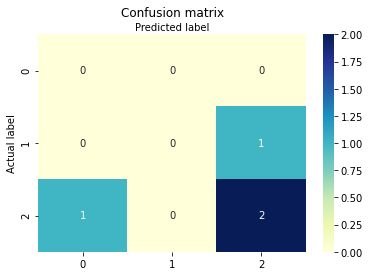

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metr

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.22      0.22      0.22         4
weighted avg       0.50      0.50      0.50         4

Accuracy: 0.5 

-------------------------------------------------------
Try 2 

Pred  1  2
Actl      
0     0  2
1     1  0
2     0  1


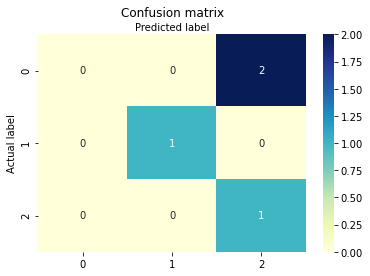

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         1
           2       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.44      0.67      0.50         4
weighted avg       0.33      0.50      0.38         4

Accuracy: 0.5 

-------------------------------------------------------
Try 3 

Pred  1  2
Actl      
0     0  1
1     1  1
2     0  1


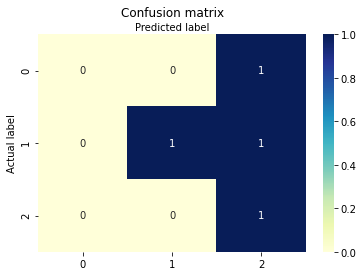

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.50      0.67         2
           2       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.44      0.50      0.39         4
weighted avg       0.58      0.50      0.46         4

Accuracy: 0.5 

-------------------------------------------------------
Try 4 

Pred  1  2
Actl      
1     2  1
2     0  1


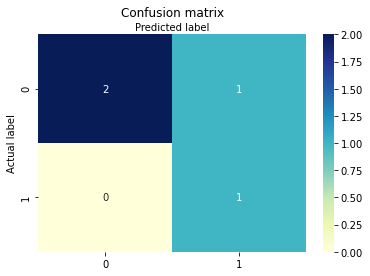

Report:
               precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Accuracy: 0.75 

-------------------------------------------------------
Try 5 

Pred  2
Actl   
0     1
1     1
2     2


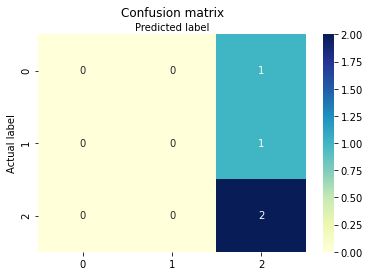

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.17      0.33      0.22         4
weighted avg       0.25      0.50      0.33         4

Accuracy: 0.5 

-------------------------------------------------------
Try 6 

Pred  1  2
Actl      
0     0  1
1     1  0
2     1  1


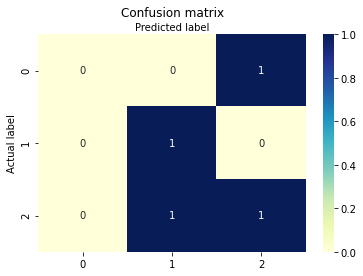

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.33      0.50      0.39         4
weighted avg       0.38      0.50      0.42         4

Accuracy: 0.5 

-------------------------------------------------------
Try 7 

Pred  1  2
Actl      
1     1  0
2     0  3


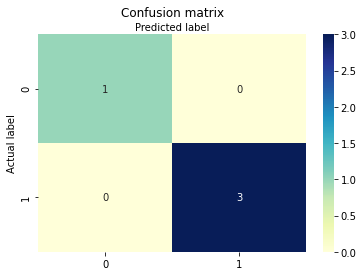

Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy: 1.0 

-------------------------------------------------------
Try 8 

Pred  1  2
Actl      
0     0  1
1     2  0
2     0  1


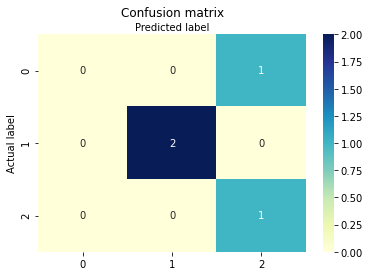

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.50      0.67      0.56         4
weighted avg       0.62      0.75      0.67         4

Accuracy: 0.75 

-------------------------------------------------------
Try 9 

Pred  2
Actl   
0     2
2     2


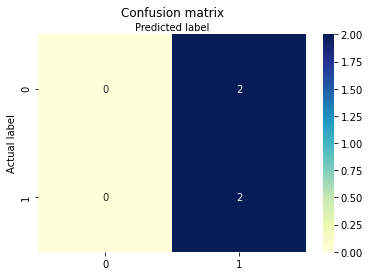

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

Accuracy: 0.5 

-------------------------------------------------------
Try 10 

Pred  1  2
Actl      
0     0  2
1     1  0
2     1  0


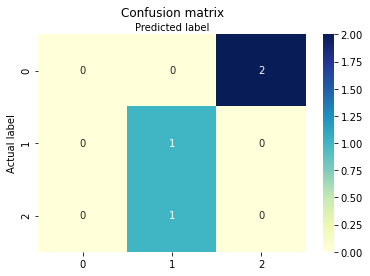

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.17      0.33      0.22         4
weighted avg       0.12      0.25      0.17         4

Accuracy: 0.25 

-------------------------------------------------------
Try 11 

Pred  1  2
Actl      
0     0  1
1     1  0
2     0  2


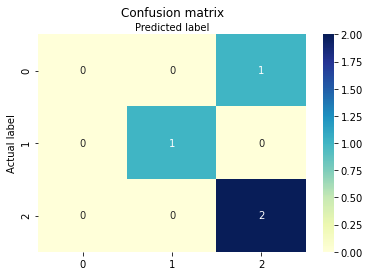

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4

Accuracy: 0.75 

-------------------------------------------------------
Try 12 

Pred  1  2
Actl      
0     0  2
1     1  0
2     0  1


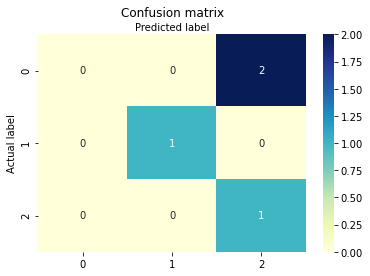

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         1
           2       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.44      0.67      0.50         4
weighted avg       0.33      0.50      0.38         4

Accuracy: 0.5 

-------------------------------------------------------
Try 13 

Pred  1  2
Actl      
2     1  3


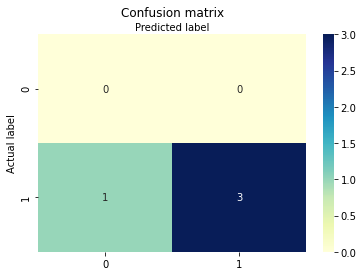

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.75      0.86         4

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4

Accuracy: 0.75 

-------------------------------------------------------
Try 14 

Pred  1  2
Actl      
0     0  1
1     2  0
2     0  1


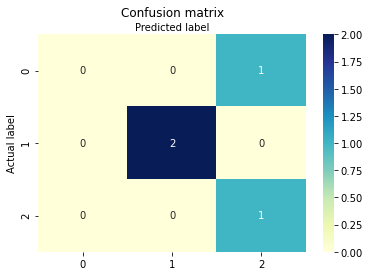

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.50      0.67      0.56         4
weighted avg       0.62      0.75      0.67         4

Accuracy: 0.75 

-------------------------------------------------------
Try 15 

Pred  1  2
Actl      
0     0  1
1     1  1
2     0  1


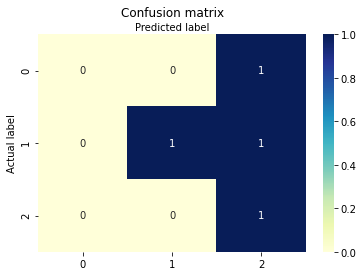

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.50      0.67         2
           2       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.44      0.50      0.39         4
weighted avg       0.58      0.50      0.46         4

Accuracy: 0.5 

-------------------------------------------------------
Try 16 

Pred  0  1  2
Actl         
1     0  2  1
2     1  0  0


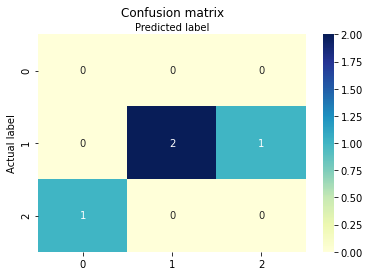

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.33      0.22      0.27         4
weighted avg       0.75      0.50      0.60         4

Accuracy: 0.5 

-------------------------------------------------------
Try 17 

Pred  0  1
Actl      
1     0  1
2     2  1


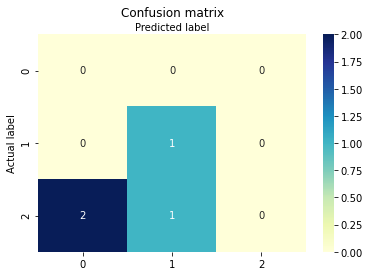

C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metr

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.17      0.33      0.22         4
weighted avg       0.12      0.25      0.17         4

Accuracy: 0.25 

-------------------------------------------------------
Try 18 

Pred  0  2
Actl      
0     1  0
2     1  2


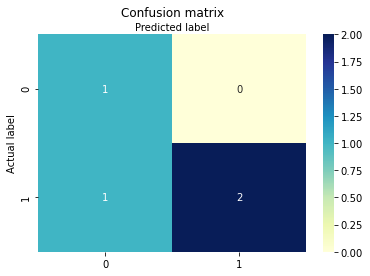

Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Accuracy: 0.75 

-------------------------------------------------------
Try 19 

Pred  0  2
Actl      
0     1  0
2     1  2


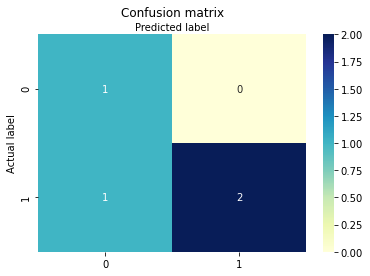

Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Accuracy: 0.75 

-------------------------------------------------------
Try 20 

Pred  1  2
Actl      
0     0  1
1     1  0
2     0  2


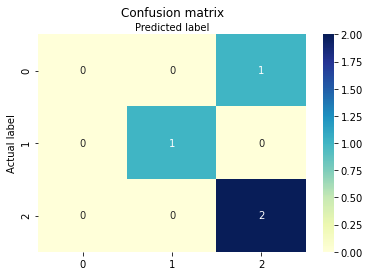

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4

Accuracy: 0.75 


Accuracy Array: [0.5  0.5  0.5  0.75 0.5  0.5  1.   0.75 0.5  0.25 0.75 0.5  0.75 0.75
 0.5  0.5  0.25 0.75 0.75 0.75]
Accuracy Mean: 0.6
Accuracy Population SD: 0.18371173070873834
Accuracy Sample SD: 0.18848425873126298
Accuracy SEM: 0.04214636152117623


C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIN SHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
X = df_2010to2020_peace.drop(['Sum', 'Group', 'Group Name'], axis=1)
y = df_2010to2020_peace['Group']

loop = 20
accuracy_arr = np.zeros(loop)

for x in range(loop):
    
    print('-------------------------------------------------------')
    print('Try', x+1, '\n')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42, n_jobs=2)
    forest.fit(X_train,y_train)

    # compute predictions
    y_pred=forest.predict(X_test)
    
    print_simple_confusion_matrx(y_test, y_pred)
    print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
    print_curr_pred_report(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, '\n')
    
    ### fill accuracy data in an array
    accuracy_arr[x] = accuracy
    
print_accuracy_report(accuracy_arr)

### ML2: All to Predict One

In [38]:
### input: a numpy data in which all test data is put in the last column,
### output: a predict array that is generated by using n-1 rows to predict 1 left
def all_to_pred_one(adata):
    rows,cols=adata.shape
    predict=np.zeros((rows))
    
    ### remove row i, train all else, test i
    for m in range(rows):
        ### np.delete(data, index, axis) return what is left
        adatam1=np.delete(adata, m, 0)
        X_train=np.delete(adatam1, cols-1, 1)
        y_train=adatam1[:,cols-1]
        # forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=42,n_jobs=2)
        forest = RandomForestClassifier(criterion='gini',n_estimators=25,n_jobs=2)
        forest.fit(X_train, y_train)
        X_test=adata[m,0:cols-1]
        X_test=X_test.reshape(1, -1)
        predict[m]=forest.predict(X_test)
    return predict

-------------------------------------------------------
Try 1 

Pred  0.0  1.0  2.0
Actl               
0.0     1    0    4
1.0     0    5    1
2.0     2    2    5


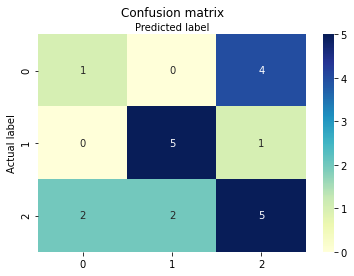

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.71      0.83      0.77         6
         2.0       0.50      0.56      0.53         9

    accuracy                           0.55        20
   macro avg       0.52      0.53      0.52        20
weighted avg       0.52      0.55      0.53        20

Accuracy: 0.55 

-------------------------------------------------------
Try 2 

Pred  0.0  1.0  2.0
Actl               
0.0     1    0    4
1.0     0    5    1
2.0     3    2    4


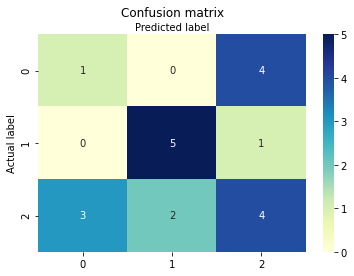

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.71      0.83      0.77         6
         2.0       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.47      0.49      0.48        20
weighted avg       0.48      0.50      0.49        20

Accuracy: 0.5 

-------------------------------------------------------
Try 3 

Pred  0.0  1.0  2.0
Actl               
0.0     0    0    5
1.0     0    4    2
2.0     2    1    6


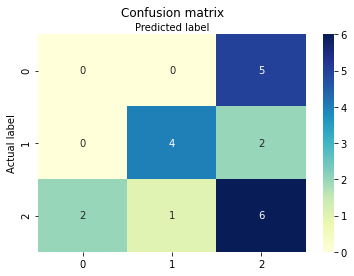

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.80      0.67      0.73         6
         2.0       0.46      0.67      0.55         9

    accuracy                           0.50        20
   macro avg       0.42      0.44      0.42        20
weighted avg       0.45      0.50      0.46        20

Accuracy: 0.5 

-------------------------------------------------------
Try 4 

Pred  0.0  1.0  2.0
Actl               
0.0     2    0    3
1.0     0    5    1
2.0     3    1    5


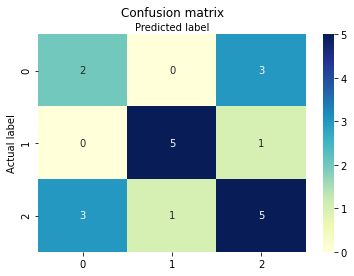

Report:
               precision    recall  f1-score   support

         0.0       0.40      0.40      0.40         5
         1.0       0.83      0.83      0.83         6
         2.0       0.56      0.56      0.56         9

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20

Accuracy: 0.6 

-------------------------------------------------------
Try 5 

Pred  0.0  1.0  2.0
Actl               
0.0     1    0    4
1.0     0    5    1
2.0     1    1    7


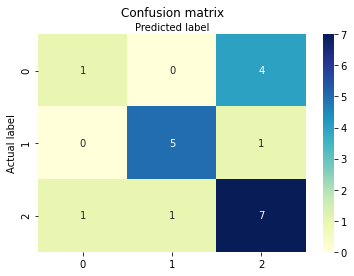

Report:
               precision    recall  f1-score   support

         0.0       0.50      0.20      0.29         5
         1.0       0.83      0.83      0.83         6
         2.0       0.58      0.78      0.67         9

    accuracy                           0.65        20
   macro avg       0.64      0.60      0.60        20
weighted avg       0.64      0.65      0.62        20

Accuracy: 0.65 

-------------------------------------------------------
Try 6 

Pred  0.0  1.0  2.0
Actl               
0.0     0    0    5
1.0     0    4    2
2.0     4    2    3


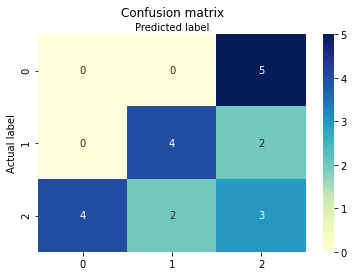

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.67      0.67      0.67         6
         2.0       0.30      0.33      0.32         9

    accuracy                           0.35        20
   macro avg       0.32      0.33      0.33        20
weighted avg       0.33      0.35      0.34        20

Accuracy: 0.35 

-------------------------------------------------------
Try 7 

Pred  0.0  1.0  2.0
Actl               
0.0     0    0    5
1.0     0    5    1
2.0     1    2    6


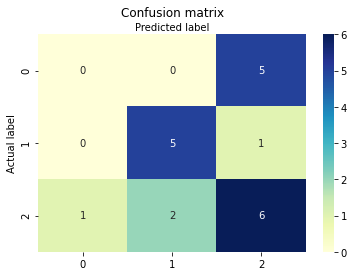

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.71      0.83      0.77         6
         2.0       0.50      0.67      0.57         9

    accuracy                           0.55        20
   macro avg       0.40      0.50      0.45        20
weighted avg       0.44      0.55      0.49        20

Accuracy: 0.55 

-------------------------------------------------------
Try 8 

Pred  0.0  1.0  2.0
Actl               
0.0     1    0    4
1.0     0    4    2
2.0     2    1    6


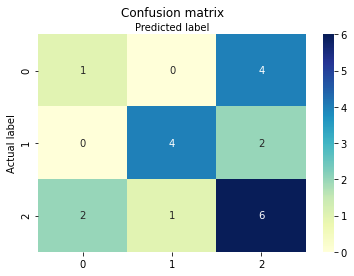

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.80      0.67      0.73         6
         2.0       0.50      0.67      0.57         9

    accuracy                           0.55        20
   macro avg       0.54      0.51      0.52        20
weighted avg       0.55      0.55      0.54        20

Accuracy: 0.55 

-------------------------------------------------------
Try 9 

Pred  0.0  1.0  2.0
Actl               
0.0     2    0    3
1.0     0    5    1
2.0     2    1    6


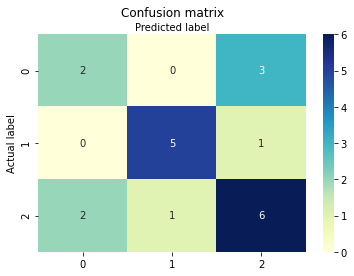

Report:
               precision    recall  f1-score   support

         0.0       0.50      0.40      0.44         5
         1.0       0.83      0.83      0.83         6
         2.0       0.60      0.67      0.63         9

    accuracy                           0.65        20
   macro avg       0.64      0.63      0.64        20
weighted avg       0.64      0.65      0.65        20

Accuracy: 0.65 

-------------------------------------------------------
Try 10 

Pred  0.0  1.0  2.0
Actl               
0.0     1    0    4
1.0     0    5    1
2.0     3    2    4


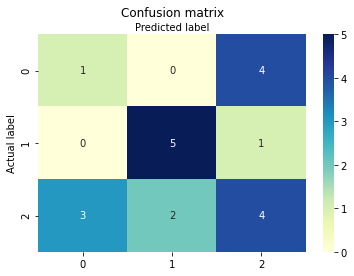

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.71      0.83      0.77         6
         2.0       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.47      0.49      0.48        20
weighted avg       0.48      0.50      0.49        20

Accuracy: 0.5 

-------------------------------------------------------
Try 11 

Pred  0.0  1.0  2.0
Actl               
0.0     0    0    5
1.0     0    5    1
2.0     2    1    6


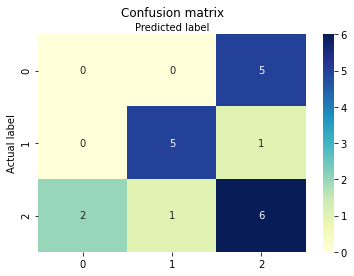

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.83      0.83      0.83         6
         2.0       0.50      0.67      0.57         9

    accuracy                           0.55        20
   macro avg       0.44      0.50      0.47        20
weighted avg       0.47      0.55      0.51        20

Accuracy: 0.55 

-------------------------------------------------------
Try 12 

Pred  0.0  1.0  2.0
Actl               
0.0     1    0    4
1.0     0    4    2
2.0     2    2    5


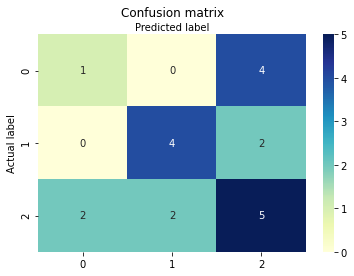

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.67      0.67      0.67         6
         2.0       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.48      0.47      0.47        20
weighted avg       0.49      0.50      0.49        20

Accuracy: 0.5 

-------------------------------------------------------
Try 13 

Pred  0.0  1.0  2.0
Actl               
0.0     1    0    4
1.0     0    4    2
2.0     2    2    5


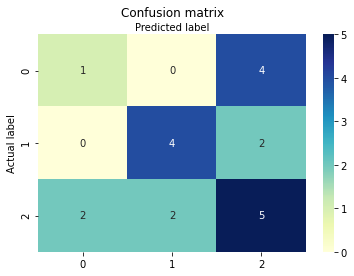

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.67      0.67      0.67         6
         2.0       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.48      0.47      0.47        20
weighted avg       0.49      0.50      0.49        20

Accuracy: 0.5 

-------------------------------------------------------
Try 14 

Pred  0.0  1.0  2.0
Actl               
0.0     1    0    4
1.0     0    5    1
2.0     2    1    6


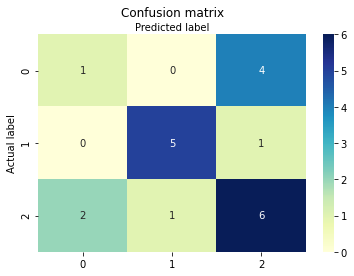

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.83      0.83      0.83         6
         2.0       0.55      0.67      0.60         9

    accuracy                           0.60        20
   macro avg       0.57      0.57      0.56        20
weighted avg       0.58      0.60      0.58        20

Accuracy: 0.6 

-------------------------------------------------------
Try 15 

Pred  0.0  1.0  2.0
Actl               
0.0     0    0    5
1.0     0    4    2
2.0     3    1    5


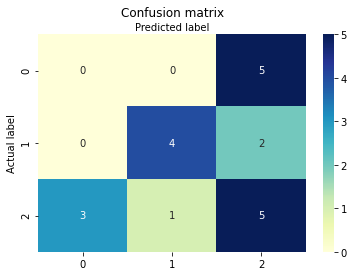

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.80      0.67      0.73         6
         2.0       0.42      0.56      0.48         9

    accuracy                           0.45        20
   macro avg       0.41      0.41      0.40        20
weighted avg       0.43      0.45      0.43        20

Accuracy: 0.45 

-------------------------------------------------------
Try 16 

Pred  0.0  1.0  2.0
Actl               
0.0     1    0    4
1.0     0    4    2
2.0     3    1    5


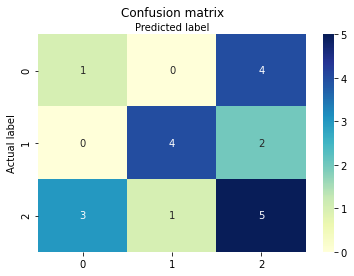

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.80      0.67      0.73         6
         2.0       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.50      0.47      0.48        20
weighted avg       0.51      0.50      0.50        20

Accuracy: 0.5 

-------------------------------------------------------
Try 17 

Pred  0.0  1.0  2.0
Actl               
0.0     0    0    5
1.0     0    5    1
2.0     2    2    5


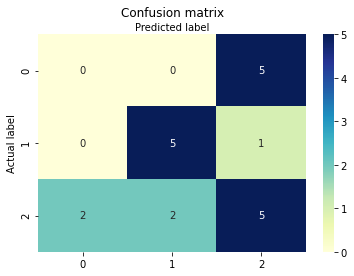

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.71      0.83      0.77         6
         2.0       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.39      0.46      0.42        20
weighted avg       0.42      0.50      0.46        20

Accuracy: 0.5 

-------------------------------------------------------
Try 18 

Pred  0.0  1.0  2.0
Actl               
0.0     1    0    4
1.0     0    5    1
2.0     2    2    5


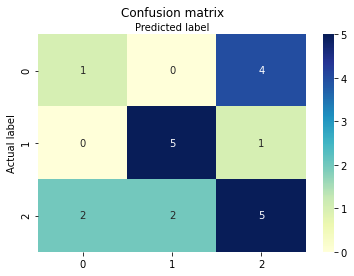

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.71      0.83      0.77         6
         2.0       0.50      0.56      0.53         9

    accuracy                           0.55        20
   macro avg       0.52      0.53      0.52        20
weighted avg       0.52      0.55      0.53        20

Accuracy: 0.55 

-------------------------------------------------------
Try 19 

Pred  0.0  1.0  2.0
Actl               
0.0     1    0    4
1.0     0    5    1
2.0     3    2    4


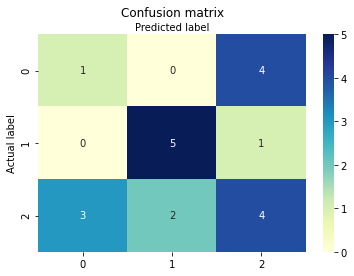

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.71      0.83      0.77         6
         2.0       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.47      0.49      0.48        20
weighted avg       0.48      0.50      0.49        20

Accuracy: 0.5 

-------------------------------------------------------
Try 20 

Pred  0.0  1.0  2.0
Actl               
0.0     2    0    3
1.0     0    5    1
2.0     2    1    6


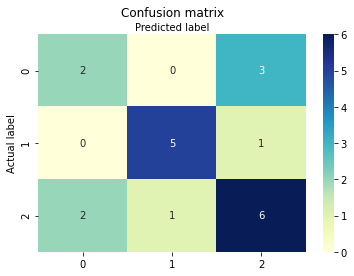

Report:
               precision    recall  f1-score   support

         0.0       0.50      0.40      0.44         5
         1.0       0.83      0.83      0.83         6
         2.0       0.60      0.67      0.63         9

    accuracy                           0.65        20
   macro avg       0.64      0.63      0.64        20
weighted avg       0.64      0.65      0.65        20

Accuracy: 0.65 


Accuracy Array: [0.55 0.5  0.5  0.6  0.65 0.35 0.55 0.55 0.65 0.5  0.55 0.5  0.5  0.6
 0.45 0.5  0.5  0.55 0.5  0.65]
Accuracy Mean: 0.535
Accuracy Population SD: 0.07088723439378913
Accuracy Sample SD: 0.07272876792721383
Accuracy SEM: 0.016262646900505662


In [39]:
### use method pd.DataFrame(df).to_numpy() to convert dataframe to numpy array
data = df_2010to2020_peace.drop(['Sum', 'Group Name'], axis=1)
adata = pd.DataFrame(data).to_numpy()
rows,cols=adata.shape

loop = 20
accuracy_arr = np.zeros(loop)

for x in range(loop):

    print('-------------------------------------------------------')
    print('Try', x+1, '\n')
        
    y_test=y_train=adata[:,cols-1]
    y_pred=all_to_pred_one(adata)

    print_simple_confusion_matrx(y_test, y_pred)
    print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
    print_curr_pred_report(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, '\n')
    
    ### fill accuracy data in an array
    accuracy_arr[x] = accuracy
          
print_accuracy_report(accuracy_arr)

### ML3: Random Prediction

-------------------------------------------------------
Try 1 

Pred  0.0  1.0  2.0
Actl               
0.0     2    2    1
1.0     2    1    3
2.0     2    4    3


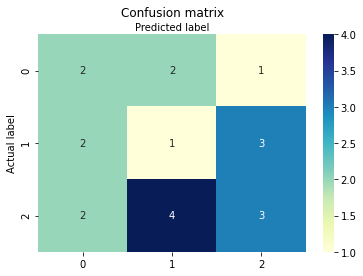

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.40      0.36         5
         1.0       0.14      0.17      0.15         6
         2.0       0.43      0.33      0.38         9

    accuracy                           0.30        20
   macro avg       0.30      0.30      0.30        20
weighted avg       0.32      0.30      0.31        20

Accuracy: 0.3 

-------------------------------------------------------
Try 2 

Pred  0.0  1.0  2.0
Actl               
0.0     3    1    1
1.0     1    2    3
2.0     4    3    2


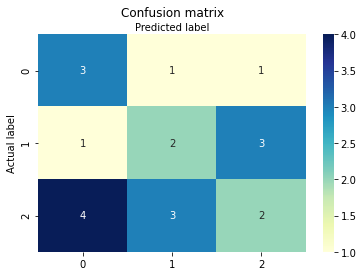

Report:
               precision    recall  f1-score   support

         0.0       0.38      0.60      0.46         5
         1.0       0.33      0.33      0.33         6
         2.0       0.33      0.22      0.27         9

    accuracy                           0.35        20
   macro avg       0.35      0.39      0.35        20
weighted avg       0.34      0.35      0.34        20

Accuracy: 0.35 

-------------------------------------------------------
Try 3 

Pred  0.0  1.0  2.0
Actl               
0.0     1    1    3
1.0     2    3    1
2.0     1    6    2


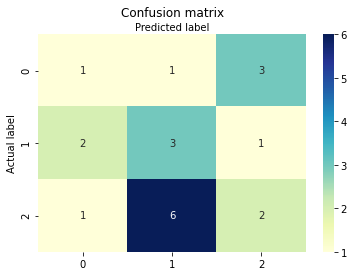

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.30      0.50      0.37         6
         2.0       0.33      0.22      0.27         9

    accuracy                           0.30        20
   macro avg       0.29      0.31      0.29        20
weighted avg       0.30      0.30      0.29        20

Accuracy: 0.3 

-------------------------------------------------------
Try 4 

Pred  0.0  1.0  2.0
Actl               
0.0     2    2    1
1.0     4    0    2
2.0     4    4    1


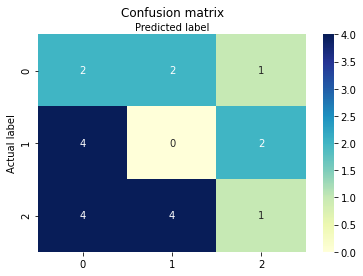

Report:
               precision    recall  f1-score   support

         0.0       0.20      0.40      0.27         5
         1.0       0.00      0.00      0.00         6
         2.0       0.25      0.11      0.15         9

    accuracy                           0.15        20
   macro avg       0.15      0.17      0.14        20
weighted avg       0.16      0.15      0.14        20

Accuracy: 0.15 

-------------------------------------------------------
Try 5 

Pred  0.0  1.0  2.0
Actl               
0.0     3    1    1
1.0     2    3    1
2.0     2    4    3


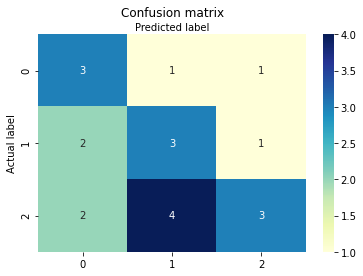

Report:
               precision    recall  f1-score   support

         0.0       0.43      0.60      0.50         5
         1.0       0.38      0.50      0.43         6
         2.0       0.60      0.33      0.43         9

    accuracy                           0.45        20
   macro avg       0.47      0.48      0.45        20
weighted avg       0.49      0.45      0.45        20

Accuracy: 0.45 

-------------------------------------------------------
Try 6 

Pred  0.0  1.0  2.0
Actl               
0.0     1    3    1
1.0     0    2    4
2.0     3    2    4


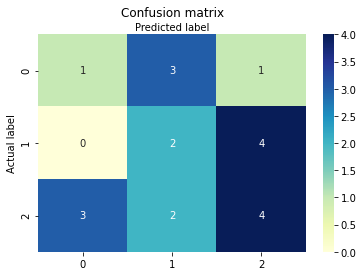

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.29      0.33      0.31         6
         2.0       0.44      0.44      0.44         9

    accuracy                           0.35        20
   macro avg       0.33      0.33      0.32        20
weighted avg       0.35      0.35      0.35        20

Accuracy: 0.35 

-------------------------------------------------------
Try 7 

Pred  0.0  1.0  2.0
Actl               
0.0     2    1    2
1.0     2    2    2
2.0     3    4    2


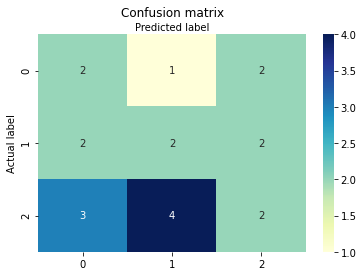

Report:
               precision    recall  f1-score   support

         0.0       0.29      0.40      0.33         5
         1.0       0.29      0.33      0.31         6
         2.0       0.33      0.22      0.27         9

    accuracy                           0.30        20
   macro avg       0.30      0.32      0.30        20
weighted avg       0.31      0.30      0.30        20

Accuracy: 0.3 

-------------------------------------------------------
Try 8 

Pred  0.0  1.0  2.0
Actl               
0.0     2    3    0
1.0     0    4    2
2.0     2    6    1


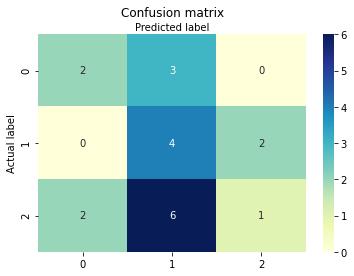

Report:
               precision    recall  f1-score   support

         0.0       0.50      0.40      0.44         5
         1.0       0.31      0.67      0.42         6
         2.0       0.33      0.11      0.17         9

    accuracy                           0.35        20
   macro avg       0.38      0.39      0.34        20
weighted avg       0.37      0.35      0.31        20

Accuracy: 0.35 

-------------------------------------------------------
Try 9 

Pred  0.0  1.0  2.0
Actl               
0.0     2    1    2
1.0     1    3    2
2.0     4    0    5


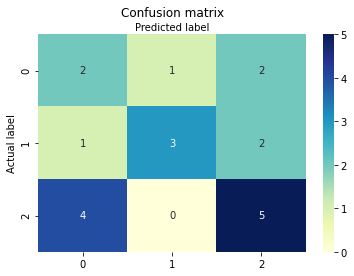

Report:
               precision    recall  f1-score   support

         0.0       0.29      0.40      0.33         5
         1.0       0.75      0.50      0.60         6
         2.0       0.56      0.56      0.56         9

    accuracy                           0.50        20
   macro avg       0.53      0.49      0.50        20
weighted avg       0.55      0.50      0.51        20

Accuracy: 0.5 

-------------------------------------------------------
Try 10 

Pred  0.0  1.0  2.0
Actl               
0.0     2    1    2
1.0     4    0    2
2.0     0    3    6


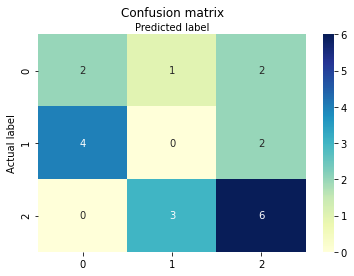

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.40      0.36         5
         1.0       0.00      0.00      0.00         6
         2.0       0.60      0.67      0.63         9

    accuracy                           0.40        20
   macro avg       0.31      0.36      0.33        20
weighted avg       0.35      0.40      0.38        20

Accuracy: 0.4 

-------------------------------------------------------
Try 11 

Pred  0.0  1.0  2.0
Actl               
0.0     1    2    2
1.0     1    3    2
2.0     2    3    4


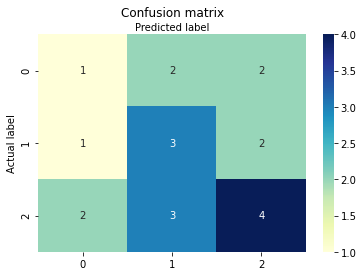

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.38      0.50      0.43         6
         2.0       0.50      0.44      0.47         9

    accuracy                           0.40        20
   macro avg       0.38      0.38      0.37        20
weighted avg       0.40      0.40      0.40        20

Accuracy: 0.4 

-------------------------------------------------------
Try 12 

Pred  0.0  1.0  2.0
Actl               
0.0     2    2    1
1.0     2    0    4
2.0     4    4    1


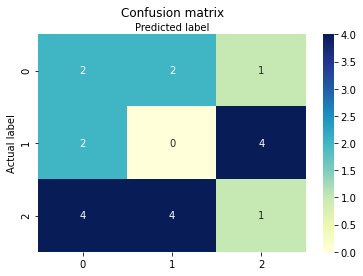

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.40      0.31         5
         1.0       0.00      0.00      0.00         6
         2.0       0.17      0.11      0.13         9

    accuracy                           0.15        20
   macro avg       0.14      0.17      0.15        20
weighted avg       0.14      0.15      0.14        20

Accuracy: 0.15 

-------------------------------------------------------
Try 13 

Pred  0.0  1.0  2.0
Actl               
0.0     1    2    2
1.0     3    0    3
2.0     5    2    2


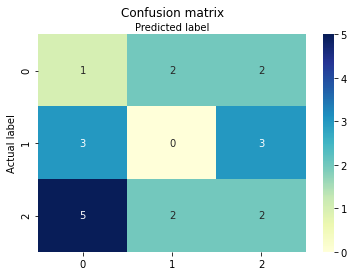

Report:
               precision    recall  f1-score   support

         0.0       0.11      0.20      0.14         5
         1.0       0.00      0.00      0.00         6
         2.0       0.29      0.22      0.25         9

    accuracy                           0.15        20
   macro avg       0.13      0.14      0.13        20
weighted avg       0.16      0.15      0.15        20

Accuracy: 0.15 

-------------------------------------------------------
Try 14 

Pred  0.0  1.0  2.0
Actl               
0.0     2    1    2
1.0     0    3    3
2.0     6    0    3


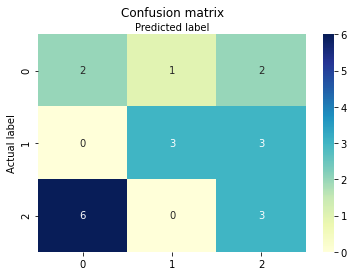

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.40      0.31         5
         1.0       0.75      0.50      0.60         6
         2.0       0.38      0.33      0.35         9

    accuracy                           0.40        20
   macro avg       0.46      0.41      0.42        20
weighted avg       0.46      0.40      0.42        20

Accuracy: 0.4 

-------------------------------------------------------
Try 15 

Pred  0.0  1.0  2.0
Actl               
0.0     2    1    2
1.0     2    2    2
2.0     4    3    2


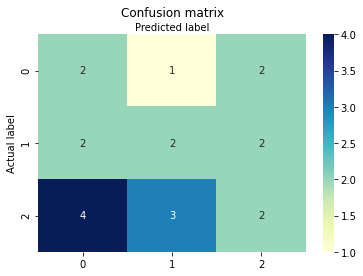

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.40      0.31         5
         1.0       0.33      0.33      0.33         6
         2.0       0.33      0.22      0.27         9

    accuracy                           0.30        20
   macro avg       0.31      0.32      0.30        20
weighted avg       0.31      0.30      0.30        20

Accuracy: 0.3 

-------------------------------------------------------
Try 16 

Pred  0.0  1.0  2.0
Actl               
0.0     2    1    2
1.0     1    3    2
2.0     4    4    1


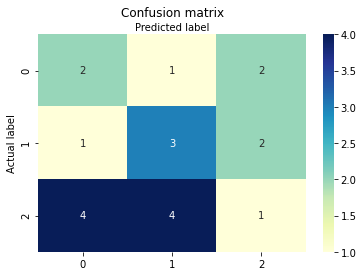

Report:
               precision    recall  f1-score   support

         0.0       0.29      0.40      0.33         5
         1.0       0.38      0.50      0.43         6
         2.0       0.20      0.11      0.14         9

    accuracy                           0.30        20
   macro avg       0.29      0.34      0.30        20
weighted avg       0.27      0.30      0.28        20

Accuracy: 0.3 

-------------------------------------------------------
Try 17 

Pred  0.0  1.0  2.0
Actl               
0.0     1    0    4
1.0     2    3    1
2.0     4    3    2


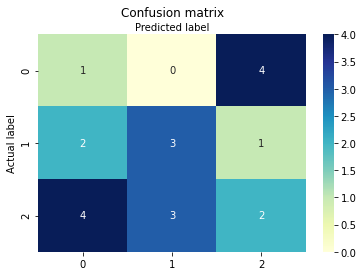

Report:
               precision    recall  f1-score   support

         0.0       0.14      0.20      0.17         5
         1.0       0.50      0.50      0.50         6
         2.0       0.29      0.22      0.25         9

    accuracy                           0.30        20
   macro avg       0.31      0.31      0.31        20
weighted avg       0.31      0.30      0.30        20

Accuracy: 0.3 

-------------------------------------------------------
Try 18 

Pred  0.0  1.0  2.0
Actl               
0.0     0    1    4
1.0     1    4    1
2.0     2    4    3


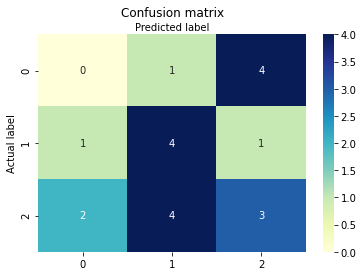

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.44      0.67      0.53         6
         2.0       0.38      0.33      0.35         9

    accuracy                           0.35        20
   macro avg       0.27      0.33      0.30        20
weighted avg       0.30      0.35      0.32        20

Accuracy: 0.35 

-------------------------------------------------------
Try 19 

Pred  0.0  1.0  2.0
Actl               
0.0     2    2    1
1.0     2    1    3
2.0     4    2    3


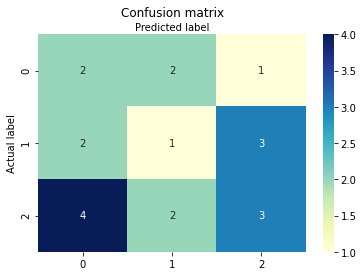

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.40      0.31         5
         1.0       0.20      0.17      0.18         6
         2.0       0.43      0.33      0.38         9

    accuracy                           0.30        20
   macro avg       0.29      0.30      0.29        20
weighted avg       0.32      0.30      0.30        20

Accuracy: 0.3 

-------------------------------------------------------
Try 20 

Pred  0.0  1.0  2.0
Actl               
0.0     0    3    2
1.0     1    2    3
2.0     2    2    5


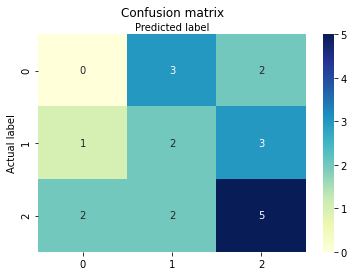

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.29      0.33      0.31         6
         2.0       0.50      0.56      0.53         9

    accuracy                           0.35        20
   macro avg       0.26      0.30      0.28        20
weighted avg       0.31      0.35      0.33        20

Accuracy: 0.35 


Accuracy Array: [0.3  0.35 0.3  0.15 0.45 0.35 0.3  0.35 0.5  0.4  0.4  0.15 0.15 0.4
 0.3  0.3  0.3  0.35 0.3  0.35]
Accuracy Mean: 0.32249999999999995
Accuracy Population SD: 0.0901041064547005
Accuracy Sample SD: 0.09244486265649893
Accuracy SEM: 0.020671299707056338


In [41]:
from random import randrange

loop = 20
accuracy_arr = np.zeros(loop)
predict=np.zeros((rows))

for x in range(loop):

    print('-------------------------------------------------------')
    print('Try', x+1, '\n')

    ### randrange(i) generate random numbers from 0 ~ (i-1) (inclusive)
    for y in range(20):
        predict[y]=randrange(3)

    y_test=y_train=adata[:,cols-1]
    y_pred=predict

    print_simple_confusion_matrx(y_test, y_pred)
    print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
    print_curr_pred_report(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, '\n')

    ### fill accuracy data in an array
    accuracy_arr[x] = accuracy
    
print_accuracy_report(accuracy_arr) 

### ML3.1: Use Chance 5/20 predict 0, 6/20 predict 1, 9/20 predict 2

In [ ]:
# loop = 20
# accuracy_arr = np.zeros(loop)

# for x in range(loop):

#     print('-------------------------------------------------------')
#     print('Try', x+1, '\n')

#     ### randrange(i) generate random numbers from 0 ~ (i-1) (inclusive)
#     for y in range(20):
#         index=randrange(20)
#         predict[y]=y_test[index]

#     y_test=y_train=adata[:,cols-1]
#     y_pred=predict

#     print_simple_confusion_matrx(y_test, y_pred)
#     print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
#     print_curr_pred_report(y_test, y_pred)

#     accuracy = accuracy_score(y_test, y_pred)
#     print("Accuracy:", accuracy, '\n')

#     ### fill accuracy data in an array
#     accuracy_arr[x] = accuracy
    
# print_accuracy_report(accuracy_arr) 

In [ ]:
# Rule: 5/20 predict 0, 6/20 predict 1, 9/20 predict 2 
# Correct answer: 1 0 1 1 2 2 1 2 2 0 2 2 0 1 2 0 1 0 2 2

# Accuracy = ( p(1st number) + p(2nd number) + ... + p(20th number) ) / total times
#          = ( 6/20 + 5/20 + 6/20 + 6/20 + 9/20 + ... + 9/20 ) / 20
#          = ( 5/20 * 5 + 6/20 * 6 + 9/20 * 9 ) / 20 
#          = 0.355

# Calculate method above (think deeper)

# Accurancy = p(Actual = 0 ∧ Prediction = 0) + p(Actual = 1 ∧ Prediction = 1) + p(Actual = 2 ∧ Prediction = 2) 
#           = (5/20 * 5/20)                  + (6/20 * 6/20)                  + (9/20 * 9/20)
#           = 0.355

# If we already know that there is 5 0s, 6 1s, and 9 2s in real data, how can we make accuracy as large as possible?
# Accurancy = p(Actual = 0 ∧ Prediction = 0) + p(Actual = 1 ∧ Prediction = 1) + p(Actual = 2 ∧ Prediction = 2) 
#           = p(fixed 5/20 ∧ 0%)             + p(fixed 6/20 ∧ 0%)             + p(fixed 9/20 ∧ 100%)
#           = 0                              + 0                              + 9/20
#           = 9/20 = 0.45 > 0.355

### ML4: Training on Extremes

-------------------------------------------------------
Try 1 

         word  importance
714     years        0.08
414      much        0.08
57        big        0.04
421  national        0.04
479    played        0.04
..        ...         ...
245       fun        0.00
246     funds        0.00
247    future        0.00
248      game        0.00
718     youth        0.00

[719 rows x 2 columns]

         word  importance
626    strong        0.08
370       lot        0.08
172    doesnt        0.04
421  national        0.04
457      part        0.04
..        ...         ...
243   friends        0.00
244      full        0.00
245       fun        0.00
246     funds        0.00
718     youth        0.00

[719 rows x 2 columns]

        word  importance
535   really        0.04
24      also        0.04
389   matter        0.04
35     areas        0.04
37    around        0.04
..       ...         ...
243  friends        0.00
244     full        0.00
245      fun        0.00
246    funds

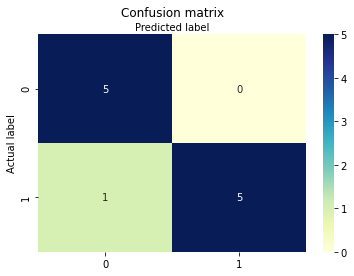

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091 

-------------------------------------------------------
Try 2 

        word  importance
580     seen        0.08
370      lot        0.08
534     real        0.04
483    point        0.04
511  project        0.04
..       ...         ...
243  friends        0.00
244     full        0.00
245      fun        0.00
246    funds        0.00
718    youth        0.00

[719 rows x 2 columns]

         word  importance
127     could        0.12
421  national        0.08
650     thats        0.08
200     every        0.08
718     youth        0.04
..        ...         ...
246     funds        0.00
247    future        0.00
248      g

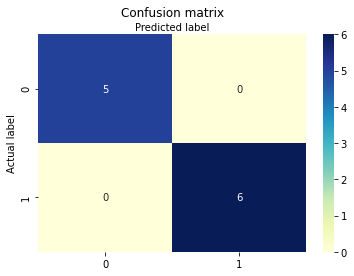

Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy: 1.0 

-------------------------------------------------------
Try 3 

        word  importance
366     long        0.04
592     show        0.04
694      way        0.04
515  provide        0.04
44      back        0.04
..       ...         ...
246    funds        0.00
247   future        0.00
248     game        0.00
249    games        0.00
718    youth        0.00

[719 rows x 2 columns]

       word  importance
297  impact        0.12
191  enough        0.04
699    weve        0.04
255    give        0.04
476    plan        0.04
..      ...         ...
247  future        0.00
248    game        0.00
249   games        0.00
250   garda        

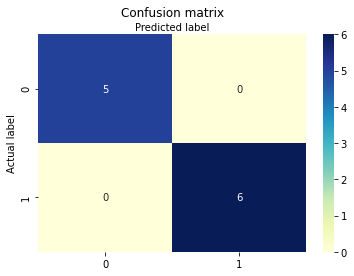

Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy: 1.0 

-------------------------------------------------------
Try 4 

        word  importance
37    around        0.08
583  serious        0.04
483    point        0.04
511  project        0.04
30   another        0.04
..       ...         ...
243  friends        0.00
244     full        0.00
245      fun        0.00
246    funds        0.00
718    youth        0.00

[719 rows x 2 columns]

          word  importance
584    service        0.04
650      thats        0.04
694        way        0.04
167  different        0.04
635       take        0.04
..         ...         ...
243    friends        0.00
244       full        0.00
245        fun  

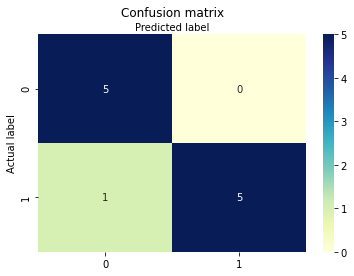

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091 

-------------------------------------------------------
Try 5 

          word  importance
27       among        0.08
219       feel        0.04
210  extremely        0.04
253        get        0.04
236    foreign        0.04
..         ...         ...
248       game        0.00
249      games        0.00
250      garda        0.00
251        gas        0.00
718      youth        0.00

[719 rows x 2 columns]

       word  importance
0      able        0.04
617   state        0.04
660    time        0.04
655  things        0.04
297  impact        0.04
..      ...         ...
244    full        0.00
245     fun        0.00
246 

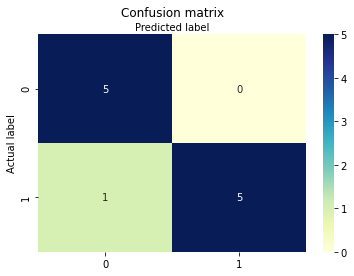

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091 

-------------------------------------------------------
Try 6 

        word  importance
652   theres        0.08
248     game        0.08
267    great        0.08
182  economy        0.04
177      due        0.04
..       ...         ...
244     full        0.00
245      fun        0.00
246    funds        0.00
247   future        0.00
718    youth        0.00

[719 rows x 2 columns]

        word  importance
701  whether        0.04
675   trying        0.04
650    thats        0.04
73      came        0.04
646    terms        0.04
..       ...         ...
246    funds        0.00
247   future        0.00
248     game       

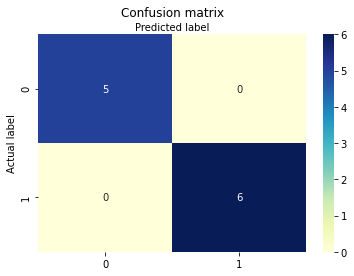

Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy: 1.0 

-------------------------------------------------------
Try 7 

            word  importance
265  governments        0.12
182      economy        0.08
131      country        0.08
219         feel        0.08
35         areas        0.08
..           ...         ...
245          fun        0.00
246        funds        0.00
247       future        0.00
248         game        0.00
718        youth        0.00

[719 rows x 2 columns]

            word  importance
65         bring        0.08
410        money        0.04
613        staff        0.04
675       trying        0.04
594  significant        0.04
..           ...         ...
245     

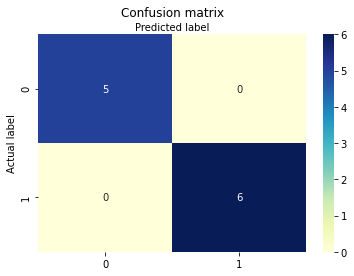

Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy: 1.0 

-------------------------------------------------------
Try 8 

       word  importance
660    time        0.12
578     see        0.04
703   whole        0.04
580    seen        0.04
661   times        0.04
..      ...         ...
245     fun        0.00
246   funds        0.00
247  future        0.00
248    game        0.00
718   youth        0.00

[719 rows x 2 columns]

           word  importance
717       youre        0.08
661       times        0.08
367        look        0.08
694         way        0.08
264  government        0.08
..          ...         ...
243     friends        0.00
244        full        0.00
245         fun    

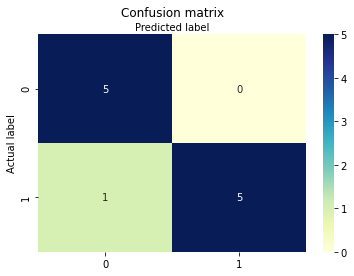

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091 

-------------------------------------------------------
Try 9 

        word  importance
216      far        0.08
127    could        0.08
658  thought        0.08
182  economy        0.04
675   trying        0.04
..       ...         ...
244     full        0.00
245      fun        0.00
246    funds        0.00
247   future        0.00
718    youth        0.00

[719 rows x 2 columns]

        word  importance
707    women        0.08
697     well        0.08
397  meeting        0.08
78      care        0.08
690   wanted        0.04
..       ...         ...
243  friends        0.00
244     full        0.00
245      fun       

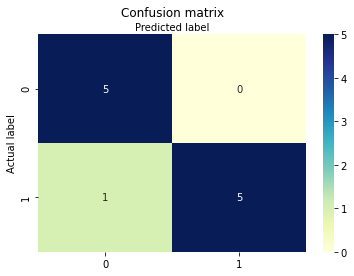

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091 

-------------------------------------------------------
Try 10 

          word  importance
323        job        0.08
35       areas        0.08
183  education        0.04
552      right        0.04
414       much        0.04
..         ...         ...
245        fun        0.00
246      funds        0.00
247     future        0.00
248       game        0.00
718      youth        0.00

[719 rows x 2 columns]

            word  importance
594  significant        0.12
24          also        0.08
315   investment        0.04
200        every        0.04
37        around        0.04
..           ...         ...
244         full

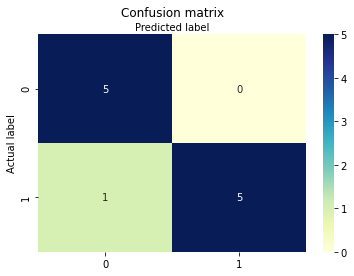

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091 

-------------------------------------------------------
Try 11 

         word  importance
277      hard        0.08
55       best        0.04
177       due        0.04
501  probably        0.04
592      show        0.04
..        ...         ...
244      full        0.00
245       fun        0.00
246     funds        0.00
247    future        0.00
718     youth        0.00

[719 rows x 2 columns]

         word  importance
578       see        0.08
181  economic        0.04
655    things        0.04
690    wanted        0.04
32   anything        0.04
..        ...         ...
243   friends        0.00
244      full        0.

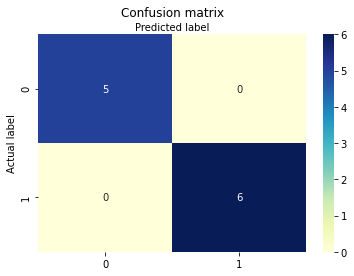

Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy: 1.0 

-------------------------------------------------------
Try 12 

          word  importance
576     sector        0.08
183  education        0.04
232       food        0.04
25      always        0.04
37      around        0.04
..         ...         ...
245        fun        0.00
246      funds        0.00
247     future        0.00
248       game        0.00
718      youth        0.00

[719 rows x 2 columns]

          word  importance
629    support        0.08
469    percent        0.04
492      power        0.04
57         big        0.04
486  political        0.04
..         ...         ...
245        fun        0.00
246      funds    

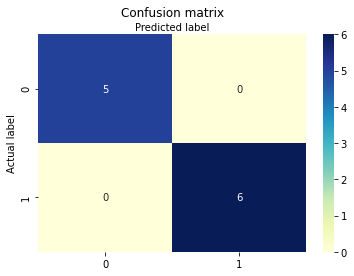

Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy: 1.0 

-------------------------------------------------------
Try 13 

       word  importance
366    long        0.08
543  report        0.08
693   water        0.04
650   thats        0.04
81    cases        0.04
..      ...         ...
245     fun        0.00
246   funds        0.00
248    game        0.00
249   games        0.00
718   youth        0.00

[719 rows x 2 columns]

        word  importance
357     life        0.08
483    point        0.08
330     kind        0.08
534     real        0.04
24      also        0.04
..       ...         ...
241     free        0.00
242  freedom        0.00
243  friends        0.00
244     full        

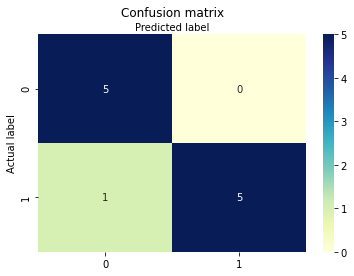

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091 

-------------------------------------------------------
Try 14 

        word  importance
248     game        0.16
191   enough        0.08
656    think        0.04
707    women        0.04
602  someone        0.04
..       ...         ...
243  friends        0.00
244     full        0.00
245      fun        0.00
246    funds        0.00
718    youth        0.00

[719 rows x 2 columns]

           word  importance
70   businesses        0.04
209  experience        0.04
46         bank        0.04
344        last        0.04
675      trying        0.04
..          ...         ...
245         fun        0.00
246       funds    

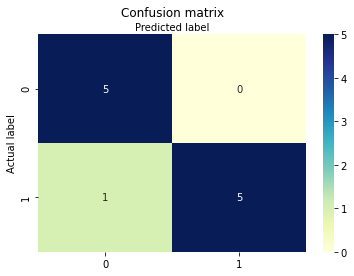

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091 

-------------------------------------------------------
Try 15 

         word  importance
658   thought        0.08
511   project        0.08
706   without        0.04
297    impact        0.04
122  continue        0.04
..        ...         ...
243   friends        0.00
244      full        0.00
245       fun        0.00
246     funds        0.00
718     youth        0.00

[719 rows x 2 columns]

            word  importance
366         long        0.04
265  governments        0.04
25        always        0.04
694          way        0.04
35         areas        0.04
..           ...         ...
243      friends        0.00

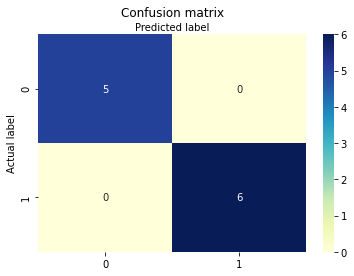

Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy: 1.0 

-------------------------------------------------------
Try 16 

       word  importance
35    areas        0.08
576  sector        0.08
253     get        0.08
219    feel        0.08
226    find        0.04
..      ...         ...
244    full        0.00
245     fun        0.00
246   funds        0.00
247  future        0.00
718   youth        0.00

[719 rows x 2 columns]

         word  importance
131   country        0.08
584   service        0.04
705    within        0.04
32   anything        0.04
690    wanted        0.04
..        ...         ...
246     funds        0.00
247    future        0.00
248      game        0.00
249     ga

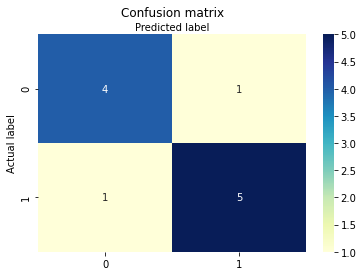

Report:
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       0.83      0.83      0.83         6

    accuracy                           0.82        11
   macro avg       0.82      0.82      0.82        11
weighted avg       0.82      0.82      0.82        11

Accuracy: 0.8181818181818182 

-------------------------------------------------------
Try 17 

         word  importance
661     times    0.083333
254   getting    0.083333
323       job    0.083333
93   children    0.041667
697      well    0.041667
..        ...         ...
243   friends    0.000000
244      full    0.000000
245       fun    0.000000
246     funds    0.000000
718     youth    0.000000

[719 rows x 2 columns]

          word  importance
603  something        0.08
59         bit        0.08
183  education        0.04
46        bank        0.04
122   continue        0.04
..         ...         ...
246      funds        0.00
247     future 

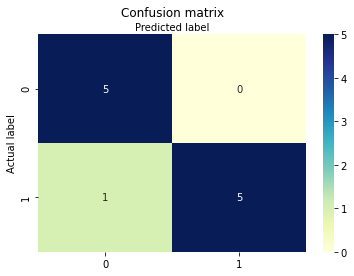

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091 

-------------------------------------------------------
Try 18 

          word  importance
414       much        0.08
712      would        0.08
354       less        0.08
525      quite        0.04
603  something        0.04
..         ...         ...
245        fun        0.00
246      funds        0.00
247     future        0.00
248       game        0.00
718      youth        0.00

[719 rows x 2 columns]

            word  importance
265  governments        0.08
565       safety        0.08
652       theres        0.08
535       really        0.04
483        point        0.04
..           ...         ...
243      friends

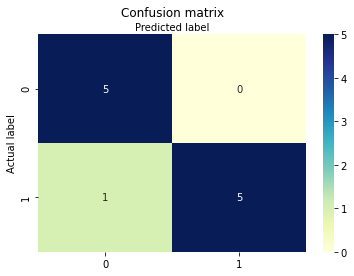

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091 

-------------------------------------------------------
Try 19 

         word  importance
650     thats        0.12
699      weve        0.08
577  security        0.04
177       due        0.04
511   project        0.04
..        ...         ...
245       fun        0.00
246     funds        0.00
247    future        0.00
249     games        0.00
718     youth        0.00

[719 rows x 2 columns]

           word  importance
59          bit        0.08
693       water        0.08
196  especially        0.08
366        long        0.04
522     quality        0.04
..          ...         ...
245         fun        0.00
246    

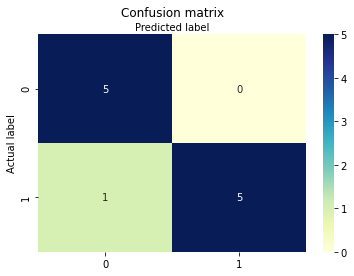

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091 

-------------------------------------------------------
Try 20 

        word  importance
534     real        0.08
25    always        0.04
327     keep        0.04
323      job        0.04
318    issue        0.04
..       ...         ...
243  friends        0.00
244     full        0.00
245      fun        0.00
246    funds        0.00
718    youth        0.00

[719 rows x 2 columns]

            word  importance
219         feel        0.08
182      economy        0.04
265  governments        0.04
420       nation        0.04
658      thought        0.04
..           ...         ...
242      freedom        0.00
243      fr

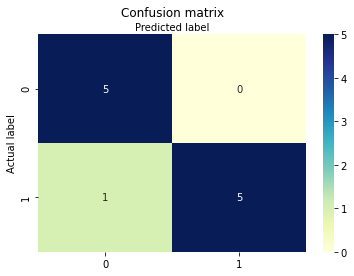

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091 


Accuracy Array: [0.90909091 1.         1.         0.90909091 0.90909091 1.
 1.         0.90909091 0.90909091 0.90909091 1.         1.
 0.90909091 0.90909091 1.         0.81818182 0.90909091 0.90909091
 0.90909091 0.90909091]
Accuracy Mean: 0.9363636363636365
Accuracy Population SD: 0.050616039662091106
Accuracy Sample SD: 0.05193096096158903
Accuracy SEM: 0.01161211588470009

['years', 'strong', 'really', 'long', 'areas', 'long', 'great', 'bit', 'team', 'also', 'thing', 'seen', 'could', 'show', 'among', 'times', 'times', 'water', 'long', 'everyone', 'youth', 'time', 'long', 'impact', 'show', 'really', 'good', 'really', 'part

In [42]:
### 6 peaceful and 5 non-peaceful countries

### use method pd.DataFrame(df).to_numpy() to convert dataframe to numpy array
df_2010to2020_peace_NoNeut = df_2010to2020_peace.drop(index=['Ghana GH', 'Hong Kong HK', 'India IN', 'Jamaica JM', 'Sri Lanka LK', 'Malaysia MY', 'Philippines PH', 'United States US', 'South Africa ZA'])
data = df_2010to2020_peace_NoNeut.drop(['Sum', 'Group Name'], axis=1)
adata = pd.DataFrame(data).to_numpy()
rows,cols=adata.shape

loop = 20
accuracy_arr = np.zeros(loop)

### save 10 the most important words in each try
important_lst = list()

for x in range(loop):

    print('-------------------------------------------------------')
    print('Try', x+1, '\n')

    ### remove row i, train all else, test i
    predict=np.zeros((rows))
    for m in range(rows):
        ### np.delete(data, index, axis) return what is left
        adatam1=np.delete(adata, m, 0)
        X_train=np.delete(adatam1, cols-1, 1)
        y_train=adatam1[:,cols-1]
        #forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=42,n_jobs=2)
        forest = RandomForestClassifier(criterion='gini',n_estimators=25,n_jobs=2)
        forest.fit(X_train, y_train)
        X_test=adata[m,0:cols-1]
        X_test=X_test.reshape(1, -1)
        predict[m]=forest.predict(X_test)  
        
        ### compute feature importance: EVERY TRYING GENERATES 10 IMPORTANCE-TABLES, HOW DO WE DEAL WITH THAT?
        q=[[0 for x in range(2)] for y in range(cols-1)]
        # print(q)
        importances = forest.feature_importances_
        # print(importances)
        for i in range(cols-1):
            q[i][0]=data.columns[i]
            q[i][1]=importances[i]
        df=pd.DataFrame(q)
        df.columns=['word','importance']
        sort=df.sort_values(by=['importance'],ascending=False)
        print(sort)
        print()
        important_lst.append(sort.iloc[0][0])

    y_test=y_train=adata[:,cols-1]
    y_pred=predict

    print_simple_confusion_matrx(y_test, y_pred)
    print_pretty_confusion_matrx(y_test, y_pred, [0,1])
    print_curr_pred_report(y_test, y_pred)
        
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, '\n')
    
    ### fill accuracy data in an array
    accuracy_arr[x] = accuracy
          
print_accuracy_report(accuracy_arr)
print()
print(important_lst)

In [43]:
df_all_wrd.index = np.arange(1,len(df_all_wrd)+1)

In [44]:
df_all_wrd_styled = df_all_wrd.iloc[:100].style.applymap(lambda x: 'color:white;background-color:green;font-weight:bold' if x in important_lst else '', subset=['High Peace'])\
                                                .applymap(lambda x: 'color:white;background-color:red;font-weight:bold' if x in important_lst else '', subset=['Low Peace'])
# display(df_all_wrd_styled)

In [45]:
# save all words dataframe as a csv file

df_all_wrd_styled.to_excel('words_list_quoted.xlsx', engine='openpyxl', index=True) 

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10000, solver='lbfgs', multi_class='ovr')

# data = df_2010to2020_peace_NoNeut.drop(['Sum', 'Group Name'], axis=1)
# adata = data.to_numpy()

# display(adata.shape)
# display(data)

In [47]:
ytrain = data.loc[:,'Group'].values
# display(ytrain)

In [48]:
xtrain = data.drop(columns=['Group']).to_numpy()
# display(xtrain)

In [49]:
model = logreg.fit(xtrain, ytrain)
# display(model.intercept_)
# display(model.coef_)

In [50]:
df_2010to2020_words.columns[0:-1]

Index(['able', 'absolutely', 'access', 'accused', 'across', 'act', 'action',
       'activities', 'actually', 'added',
       ...
       'workers', 'working', 'world', 'would', 'year', 'years', 'yet', 'young',
       'youre', 'youth'],
      dtype='object', length=719)

In [51]:
### produce a dataframe to show coefficient for each word
  
### creates Dataframe
df_words_coef = pd.DataFrame({
    'Words' : df_2010to2020_words.columns[0:-1],
    'Coefficient' : model.coef_[0]
})

### sorting in decending order by absolute value of Coefficient
df_words_coef = df_words_coef.reindex(df_words_coef.Coefficient.abs().sort_values(ascending=False).index)
# display(df_words_coef)

In [52]:
### Adding intercept value at top

new_row = pd.DataFrame({'Words': 'Intercept', 'Coefficient' : model.intercept_}, index = [0])
df_words_coef_sort = pd.concat([new_row, df_words_coef]).reset_index(drop = True)
# display(df_words_coef_sort)

In [53]:
### These are all middle countries that we need to predict

df_2010to2020_peace_AllNeut = df_2010to2020_peace.drop(index=['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ireland IE', 'Kenya KE', 'Nigeria NG', 'New Zealand NZ', 'Pakistan PK', 'Singapore SG', 'Tanzania TZ'])
df_xtest_AllNeut = df_2010to2020_peace_AllNeut.drop(['Sum', 'Group', 'Group Name'], axis=1)
# display(df_xtest_AllNeut)

### Use Build-in Method to Predict Middle Countries

In [54]:
xtest_AllNeut = df_xtest_AllNeut.to_numpy()
prob_pred_AllNeut = model.predict_proba(xtest_AllNeut)
# print(prob_pred_AllNeut)

print('Predictions (probablility to be a peaceful country):')
print('Ghana GH: ', "{:.2%}".format(prob_pred_AllNeut[0][1]))
print('Hong Kong HK: ', "{:.2%}".format(prob_pred_AllNeut[1][1]))
print('India IN: ', "{:.2%}".format(prob_pred_AllNeut[2][1]))
print('Jamaica JM: ', "{:.2%}".format(prob_pred_AllNeut[3][1]))
print('Sri Lanka LK: ', "{:.2%}".format(prob_pred_AllNeut[4][1]))
print('Malaysia MY: ', "{:.2%}".format(prob_pred_AllNeut[5][1]))
print('Philippines PH: ', "{:.2%}".format(prob_pred_AllNeut[6][1]))
print('United States US: ', "{:.2%}".format(prob_pred_AllNeut[7][1]))
print('South Africa ZA: ', "{:.2%}".format(prob_pred_AllNeut[8][1]))

Predictions (probablility to be a peaceful country):
Ghana GH:  38.61%
Hong Kong HK:  57.65%
India IN:  15.91%
Jamaica JM:  65.45%
Sri Lanka LK:  9.67%
Malaysia MY:  26.68%
Philippines PH:  49.90%
United States US:  96.43%
South Africa ZA:  60.82%


### Predict Extreme Countries

In [55]:
prob_pred_NoNeut = model.predict_proba(xtrain)
# print(prob_pred_NoNeut)

print('Predictions (probablility to be a peaceful country):')
print('Australia AU (1): ', "{:.2%}".format(prob_pred_NoNeut[0][1]))
print('Bangladesh BD (0): ', "{:.2%}".format(prob_pred_NoNeut[1][1]))
print('Canada CA (1): ', "{:.2%}".format(prob_pred_NoNeut[2][1]))
print('United Kingdom GB (1): ', "{:.2%}".format(prob_pred_NoNeut[3][1]))
print('Ireland IE (1): ', "{:.2%}".format(prob_pred_NoNeut[4][1]))
print('Kenya KE (0): ', "{:.2%}".format(prob_pred_NoNeut[5][1]))
print('Nigeria NG (0): ', "{:.2%}".format(prob_pred_NoNeut[6][1]))
print('New Zealand NZ (1): ', "{:.2%}".format(prob_pred_NoNeut[7][1]))
print('Pakistan PK (0): ', "{:.2%}".format(prob_pred_NoNeut[8][1]))
print('Singapore SG (1): ', "{:.2%}".format(prob_pred_NoNeut[9][1]))
print('Tanzania TZ (0): ', "{:.2%}".format(prob_pred_NoNeut[10][1]))

Predictions (probablility to be a peaceful country):
Australia AU (1):  95.58%
Bangladesh BD (0):  16.07%
Canada CA (1):  97.49%
United Kingdom GB (1):  92.08%
Ireland IE (1):  92.70%
Kenya KE (0):  8.52%
Nigeria NG (0):  5.67%
New Zealand NZ (1):  96.27%
Pakistan PK (0):  10.56%
Singapore SG (1):  78.67%
Tanzania TZ (0):  6.39%
